## Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.

In [94]:
# мы не можем использовать one sample t test, потому что у нас нет выборочного ско. Z-тест применяется 
#при проверке нулевой гипотезы о том, что математическое ожидание случайной величины равно некоторому значению
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic
import math

std_ = 0.4/math.sqrt(160)
print(_zconfint_generic(0.02, std_, 0.52709, 'two-sided'))#(mean, std_mean, alpha, alternative)
#0 в дов инт. отвергнуть при 0,05 нельзя - это и так понятно, но начиная с 0.52709 можно для двухсторонней альтернативы
stata = 0.02/std_
from scipy.stats import norm
p_val = 1 - norm.cdf(stata, loc=0, scale=1)
print('односторонняя альтернатива', p_val)

(3.59737804857263e-08, 0.03999996402621951)
односторонняя альтернатива 0.26354462843276905


## Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На обучающей выборке настройте две регрессионные модели:

линейную регрессию с помощью LinearRegression без параметров
случайный лес с помощью RandomForestRegressor с random_state=1.
Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости \alpha=0.05α=0.05?

In [42]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:\\Users\\user_PC\\Desktop\\diamonds.txt', sep="\t", header=0)
print(df.head(10), df.columns)

   carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31
2   0.23   56.9   65.0    327  4.05  4.07  2.31
3   0.29   62.4   58.0    334  4.20  4.23  2.63
4   0.31   63.3   58.0    335  4.34  4.35  2.75
5   0.24   62.8   57.0    336  3.94  3.96  2.48
6   0.24   62.3   57.0    336  3.95  3.98  2.47
7   0.26   61.9   55.0    337  4.07  4.11  2.53
8   0.22   65.1   61.0    337  3.87  3.78  2.49
9   0.23   59.4   61.0    338  4.00  4.05  2.39 Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

Y_set = df['price']
X_set = df.drop(columns=['price'])
X_train, X_test, Y_train, Y_test = train_test_split(X_set, Y_set, test_size=0.25, random_state=1)

reg = LinearRegression().fit(X_train, Y_train)
y_pred_rf1 =reg.predict(X_test)

rnd_clf = RandomForestRegressor(n_estimators = 100)
#rnd_clf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
#           max_features='auto', max_leaf_nodes=None,
#           min_impurity_decrease=0.0, min_impurity_split=None,
#           min_samples_leaf=1, min_samples_split=2,
#           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
#           oob_score=False, random_state=0, verbose=0, warm_start=False)
rnd_clf.fit(X_train, Y_train)
y_pred_rf2 = rnd_clf.predict(X_test)
    
   



In [47]:
regr_mse_list_abs = [abs(x-y) for x,y in zip(y_pred_rf1, Y_test)]
lr_mean = np.mean(regr_mse_list_abs)
lr_std = np.std(regr_mse_list_abs,ddof = 1)
print('linear regr. mean = {}, std = {}'.format(lr_mean, lr_std))

forest_mse_list_abs = [abs(x-y) for x,y in zip(y_pred_rf2, Y_test)]
forest_mean = np.mean(forest_mse_list_abs)
forest_std = np.std(forest_mse_list_abs,ddof = 1)
print('rand forest. mean = {}, std = {}'.format(forest_mean, forest_std))

linear regr. mean = 890.3764004285591, std = 1161.0684613926044
rand forest. mean = 780.113844334779, std = 1115.0153514423284


### проверим форму распределения ошибок линейной регерессии

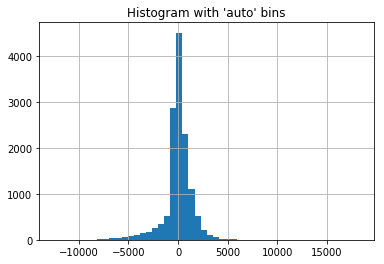

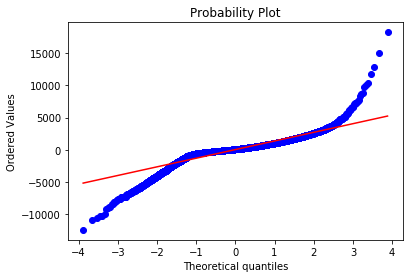

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
manual_mse_list1 = [(x-y) for x,y in zip(y_pred_rf1, Y_test)]
plt.grid(True)
plt.hist(manual_mse_list1, bins=50)  
plt.title("Histogram with 'auto' bins")
plt.show()

stats.probplot(manual_mse_list1, dist="norm", plot=pylab)
pylab.show()

![](image)
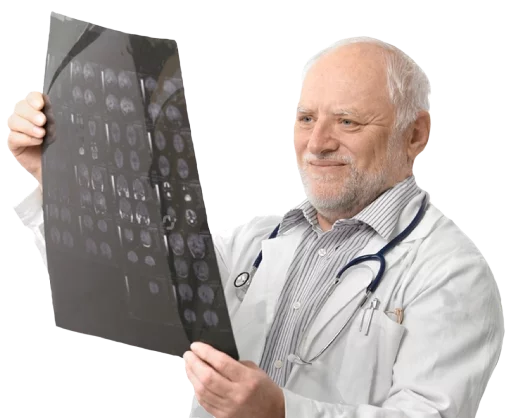

### проверим форму распределения ошибок леса

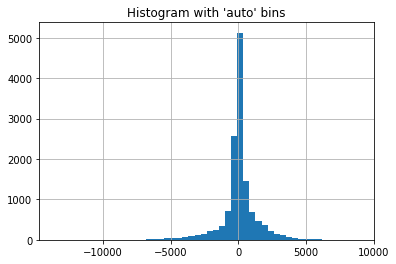

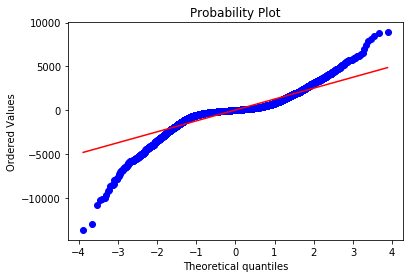

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
manual_mse_list2 = [(x-y) for x,y in zip(y_pred_rf2, Y_test)]
plt.grid(True)
plt.hist(manual_mse_list2, bins=50)  
plt.title("Histogram with 'auto' bins")
plt.show()

stats.probplot(manual_mse_list2, dist="norm", plot=pylab)
pylab.show()

 ### проверим форму распределения разности ошибок 2 моделей

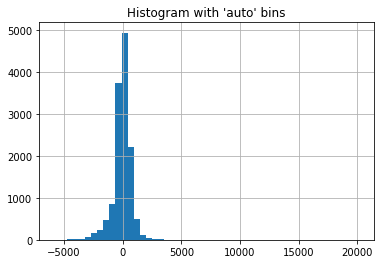

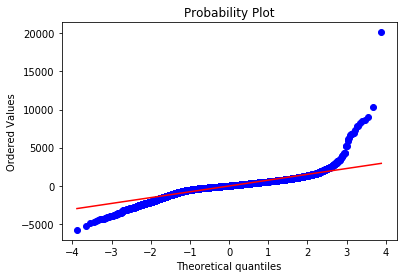

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
manual_mse_list3 = [(x-y) for x,y in zip(manual_mse_list1, manual_mse_list2)]
plt.grid(True)
plt.hist(manual_mse_list3, bins=50)  
plt.title("Histogram with 'auto' bins")
plt.show()

stats.probplot(manual_mse_list3, dist="norm", plot=pylab)
pylab.show()

### они хотят от меня двухвыборочный критерий Стьюдента (зависмые выборки)

![](image)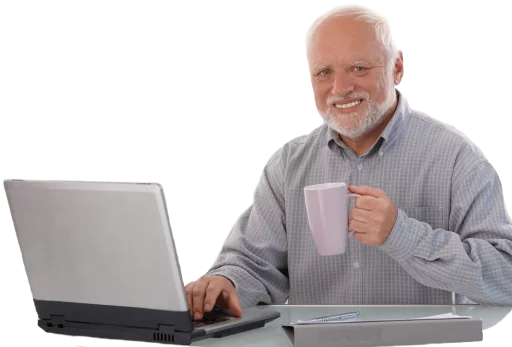

In [57]:
import scipy.stats as stats
import numpy as np
import math
from statsmodels.stats.weightstats import *

model_difference = [(x-y) for x,y in zip(regr_mse_list_abs, forest_mse_list_abs)]
model_difference_std = np.std(model_difference, ddof = 1)/math.sqrt(len(model_difference))

# нужен двухсторонний критерий
stats.ttest_rel(regr_mse_list_abs, forest_mse_list_abs)
print ("95%% confidence interval: [%f, %f]" % DescrStatsW(model_difference).tconfint_mean())


from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic
print ("разница оценок моделей 95%% confidence interval", _tconfint_generic(np.mean(model_difference), model_difference_std,
                                                                       len(model_difference) - 1,
                                                                       0.05, 'two-sided'))

95% confidence interval: [98.124557, 122.400555]
разница оценок моделей 95%% confidence interval (98.12455724708558, 122.40055494047486)


## В одном из выпусков программы "Разрушители легенд" проверялось, действительно ли заразительна зевота. В эксперименте участвовало 50 испытуемых, проходивших собеседование на программу. Каждый из них разговаривал с рекрутером; в конце 34 из 50 бесед рекрутер зевал. Затем испытуемых просили подождать решения рекрутера в соседней пустой комнате.

Во время ожидания 10 из 34 испытуемых экспериментальной группы и 4 из 16 испытуемых контрольной начали зевать. Таким образом, разница в доле зевающих людей в этих двух группах составила примерно 4.4%. Ведущие заключили, что миф о заразительности зевоты подтверждён.

Можно ли утверждать, что доли зевающих в контрольной и экспериментальной группах отличаются статистически значимо? Посчитайте достигаемый уровень значимости при альтернативе заразительности зевоты, округлите до четырёх знаков после десятичной точки.

#### нужен Z-критерий для разности долей (независимые выборки)
 | $X_1$ | $X_2$  
  ------------- | -------------|
  1  | a | b 
  0  | c | d 
  $\sum$ | $n_1$| $n_2$
  
$$ \hat{p}_1 = \frac{a}{n_1}$$

$$ \hat{p}_2 = \frac{b}{n_2}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\; \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$

$$Z-статистика: Z({X_1, X_2}) =  \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{P(1 - P)(\frac{1}{n_1} + \frac{1}{n_2})}}$$
$$P = \frac{\hat{p}_1{n_1} + \hat{p}_2{n_2}}{{n_1} + {n_2}} $$

In [8]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [9]:
import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

zevaki = [0]*24+[1]*10
nezevaki = [0]*12+[1]*4

print ("95%% confidence interval for a difference between proportions: [%f, %f]"% proportions_diff_confint_ind(nezevaki, zevaki))
print ("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(nezevaki, zevaki)))
print ("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(nezevaki, zevaki), 'less')) # наш случай
print ("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(nezevaki, zevaki), 'greater'))

95% confidence interval for a difference between proportions: [-0.305793, 0.217558]
p-value: 0.745861
p-value: 0.372930
p-value: 0.627070


## Отделите 50 случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На оставшихся 150 настройте два классификатора поддельности банкнот:

логистическая регрессия по признакам X_1,X_2,X_3X 
1
​	 ,X 
2
​	 ,X 
3
​	 ;
логистическая регрессия по признакам X_4,X_5,X_6X 
4
​	 ,X 
5
​	 ,X 
6
​	 .
Каждым из классификаторов сделайте предсказания меток классов на тестовой выборке. Одинаковы ли доли ошибочных предсказаний двух классификаторов? Проверьте гипотезу, вычислите достигаемый уровень значимости. Введите номер первой значащей цифры (например, если вы получили 5.5\times10^{-8}5.5×10 
−8
 , нужно ввести 8).

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np

df = pd.read_csv('C:\\Users\\user_PC\\Desktop\\banknotes.txt', sep="\t", header=0)
print(df.head(10), df.columns)

      X1     X2     X3    X4    X5     X6  real
0  214.8  131.0  131.1   9.0   9.7  141.0     1
1  214.6  129.7  129.7   8.1   9.5  141.7     1
2  214.8  129.7  129.7   8.7   9.6  142.2     1
3  214.8  129.7  129.6   7.5  10.4  142.0     1
4  215.0  129.6  129.7  10.4   7.7  141.8     1
5  215.7  130.8  130.5   9.0  10.1  141.4     1
6  215.5  129.5  129.7   7.9   9.6  141.6     1
7  214.5  129.6  129.2   7.2  10.7  141.7     1
8  214.9  129.4  129.7   8.2  11.0  141.9     1
9  215.2  130.4  130.3   9.2  10.0  140.7     1 Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'real'], dtype='object')


In [14]:
Y_set = df['real']
X_set = df.drop(columns=['real'])
X_set1 = df[['X1', 'X2', 'X3']]
X_set2 = df[['X4', 'X5', 'X6']]

X_train1, X_test1, Y_train, Y_test = train_test_split(X_set1, Y_set, test_size=0.25, random_state=1)
X_train2, X_test2, Y_train, Y_test = train_test_split(X_set2, Y_set, test_size=0.25, random_state=1)

reg1 = LinearRegression().fit(X_train1, Y_train)
reg2 = LinearRegression().fit(X_train2, Y_train)

y_pred_reg1 = [round(x) for x in reg1.predict(X_test1)]
y_pred_reg2 = [round(x) for x in reg2.predict(X_test2)]

mistakes_predictions1 = abs(np.array(Y_test) - y_pred_reg1) # 1 - ошибка 0 -угадала
mistakes_predictions2 = abs(np.array(Y_test) - y_pred_reg2)
print(len(mistakes_predictions1), len(mistakes_predictions2))

50 50


In [15]:
import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

print ("p-value 2 sided: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(mistakes_predictions1, mistakes_predictions2)))
print ("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(mistakes_predictions1, mistakes_predictions2), 'less')) # наш случай
print ("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(mistakes_predictions1, mistakes_predictions2), 'greater'))

p-value 2 sided: 0.014445
p-value: 0.992777
p-value: 0.007223


#### В предыдущей задаче посчитайте 95% доверительный интервал для разности долей ошибок двух классификаторов. Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после десятичной точки.

In [17]:
#на форуме писали, что здесь, в отл от предыдущей стадии надо брать уже связанные выборки, также говорят, что тест проходит не всегда.
#Z-критерий для разности долей (связанные выборки)
import scipy
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = zip(sample1, sample2)
    n = len(sample1)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)
def proportions_diff_z_stat_rel(sample1, sample2):
    sample = zip(sample1, sample2)
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

print ("95%% confidence interval for a difference between proportions: [%f, %f]" % proportions_diff_confint_rel(mistakes_predictions1, mistakes_predictions2))

95% confidence interval for a difference between proportions: [0.043822, 0.236178]


## Ежегодно более 200000 людей по всему миру сдают стандартизированный экзамен GMAT при поступлении на программы MBA. Средний результат составляет 525 баллов, стандартное отклонение — 100 баллов.

Сто студентов закончили специальные подготовительные курсы и сдали экзамен. Средний полученный ими балл — 541.4. Проверьте гипотезу о неэффективности программы против односторонней альтернативы о том, что программа работает. Отвергается ли на уровне значимости 0.05 нулевая гипотеза? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки.

In [69]:
#нужна z тстистика, которая имеет стандартное норм распределение
import math

std_ = 100/math.sqrt(100)
mean = (541.4 - 525)
stata = mean/std_
print(stata)

1.6399999999999977


In [70]:
from scipy.stats import norm
p_val = 1 - norm.cdf(stata, loc=0, scale=1)
print(p_val, 1-p_val)

0.05050258347410397 0.949497416525896


## Оцените теперь эффективность подготовительных курсов, средний балл 100 выпускников которых равен 541.5. Отвергается ли на уровне значимости 0.05 та же самая нулевая гипотеза против той же самой альтернативы?

In [71]:
import math

std_ = 100/math.sqrt(100)
mean = (541.5 - 525)
stata = mean/std_
print(stata)
from scipy.stats import norm
p_val = 1 - norm.cdf(stata, loc=0, scale=1)
print(p_val, 1-p_val)

1.65
0.0494714680336481 0.9505285319663519


# тест 2

## Давайте вернёмся к данным выживаемости пациентов с лейкоцитарной лимфомой из видео про критерий знаков. 49,58,75,110,112,132,151,276,281,362*

Измерено остаточное время жизни с момента начала наблюдения (в неделях); звёздочка обозначает цензурирование сверху — исследование длилось 7 лет, и остаточное время жизни одного пациента, который дожил до конца наблюдения, неизвестно.

Поскольку цензурировано только одно наблюдение, для проверки гипотезы H0:medX=200 на этих данных можно использовать критерий знаковых рангов — можно считать, что время дожития последнего пациента в точности равно 362, на ранг этого наблюдения это никак не повлияет.

Критерием знаковых рангов проверьте эту гипотезу против двусторонней альтернативы, введите достигаемый уровень значимости, округлённый до четырёх знаков после десятичной точки.

In [3]:
# хотят вилкоксона
data = [49,58,75,110,112,132,151,276,281,362]
data_ = [x - 200 for x in data]

from scipy.stats import wilcoxon
w, p = wilcoxon(data_)
print(w,p)

17.0 0.2845026979112075


## В ходе исследования влияния лесозаготовки на биоразнообразие лесов острова Борнео собраны данные о количестве видов деревьев в 12 лесах, где вырубка не ведётся: 
[22,22,15,13,19,19,18,20,21,13,13,15]
и в 9 лесах, где идёт вырубка:
[17,18,18,15,12,4,14,15,10]
Проверьте гипотезу о равенстве среднего количества видов в двух типах лесов против односторонней альтернативы о снижении биоразнообразия в вырубаемых лесах. Используйте ранговый критерий. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки.

In [6]:
# хотят манна-уитни (проверка равенства медиан)
st = [22,22,15,13,19,19,18,20,21,13,13,15]
nd = [17,18,18,15,12,4,14,15,10]
from scipy.stats import mannwhitneyu
print(mannwhitneyu(st, nd, use_continuity=True, alternative='less'))
print(mannwhitneyu(st, nd, use_continuity=True, alternative='greater'))

MannwhitneyuResult(statistic=81.0, pvalue=0.9754173498919905)
MannwhitneyuResult(statistic=81.0, pvalue=0.02900499272087373)


## 28 января 1986 года космический шаттл "Челленджер" взорвался при взлёте. Семь астронавтов, находившихся на борту, погибли. В ходе расследования причин катастрофы основной версией была неполадка с резиновыми уплотнительными кольцами в соединении с ракетными ускорителями. Для 23 предшествовавших катастрофе полётов "Челленджера" известны температура воздуха и появление повреждений хотя бы у одного из уплотнительных колец.
 помощью бутстрепа постройте 95% доверительный интервал для разности средних температур воздуха при запусках, когда уплотнительные кольца повреждались, и запусках, когда повреждений не было. Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после запятой.

Чтобы получить в точности такой же доверительный интервал, как у нас:

установите random seed = 0 перед первым вызовом функции get_bootstrap_samples, один раз
сделайте по 1000 псевдовыборок из каждой выборки.

In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:\\Users\\user\\Desktop\\challenger.txt', sep="\t", header=0)
print(df.head(5), df.columns)

          Temperature  Incident
Apr12.81         18.9         0
Nov12.81         21.1         1
Mar22.82         20.6         0
Nov11.82         20.0         0
Apr04.83         19.4         0 Index(['Temperature', 'Incident'], dtype='object')


In [10]:
norm_temp = df[df.Incident ==0]['Temperature']
inc_temp = df[df.Incident ==1]['Temperature']


In [11]:
import numpy as np
import pandas as pd
np.random.seed(0)

def get_bootstrap_samples(data, n_samples):
    'n_samples - количество псевдовыборок c возвращением -элементы в псевдовыборке могут повторяться'
    'data - pd.Series(генеральной совокупности)'
    'функция возвращает список выборок длиной data в количестве n_samples'
    indices = np.random.randint(0, len(data), (n_samples, len(data))) 
    samples = []
    for i in indices:
        samples.append(data[i])
    return samples

bootst_norm = list(map(lambda x:x, get_bootstrap_samples(norm_temp, 1000)))
bootst_inc = list(map(lambda x:x, get_bootstrap_samples(inc_temp, 1000)))
temp_difference = [np.mean(i) - np.mean(j) for i,j in zip(bootst_norm, bootst_inc)]


def stat_intervals(stat, alpha):
    'alpha [0,1], stat - список наших статистик из бутстрепа'
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

print ("95% confidence interval",  stat_intervals(temp_difference, 0.05))

95% confidence interval [1.42299107 7.93861607]


### На данных предыдущей задачи проверьте гипотезу об одинаковой средней температуре воздуха в дни, когда уплотнительный кольца повреждались, и дни, когда повреждений не было. Используйте перестановочный критерий и двустороннюю альтернативу. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки.

Чтобы получить такое же значение, как мы:

установите random seed = 0;
возьмите 10000 перестановок.

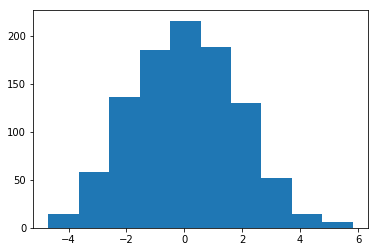

In [12]:
import pylab
np.random.seed(0)

norm_temp = df[df['Incident']  == 0].Temperature
incident_temp = df[df['Incident']  == 1].Temperature

def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr
pylab.hist(permutation_zero_dist_ind(norm_temp, incident_temp, max_combinations = 1000))
pylab.show()

In [14]:
np.random.seed(0)
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)
    
print ("p-value: %f" % permutation_test(norm_temp, incident_temp, max_permutations = 10000))
print ("p-value: %f" % permutation_test(incident_temp, norm_temp, max_permutations = 10000))

p-value: 0.007000
p-value: 0.004600
